In [1]:
from keras.layers.rnn import LSTM
from keras.layers import Dense
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import pandas_datareader as web
import datetime

In [2]:
df=pd.read_csv('/content/GOOG (1).csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,14.856315,15.083214,14.856315,15.052330,15.052330,94962614
1,2011-01-04,15.083962,15.097909,14.946975,14.996788,14.996788,73253547
2,2011-01-05,14.945730,15.201272,14.945232,15.169890,15.169890,101671667
3,2011-01-06,15.209989,15.403016,15.194298,15.280226,15.280226,82620526
4,2011-01-07,15.340251,15.398533,15.196291,15.353451,15.353451,84363033
...,...,...,...,...,...,...,...
3138,2023-06-23,122.040001,123.440002,121.860001,123.019997,123.019997,29542900
3139,2023-06-26,121.466003,122.720001,118.989998,119.089996,119.089996,23185000
3140,2023-06-27,117.839996,119.894997,116.910004,119.010002,119.010002,27221700
3141,2023-06-28,117.959999,121.269997,117.599998,121.080002,121.080002,19753100


In [4]:
def str_to_date(s):
  split= s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

In [5]:
df.Date=df.Date.apply(str_to_date)

In [6]:
df.index = df.pop('Date')

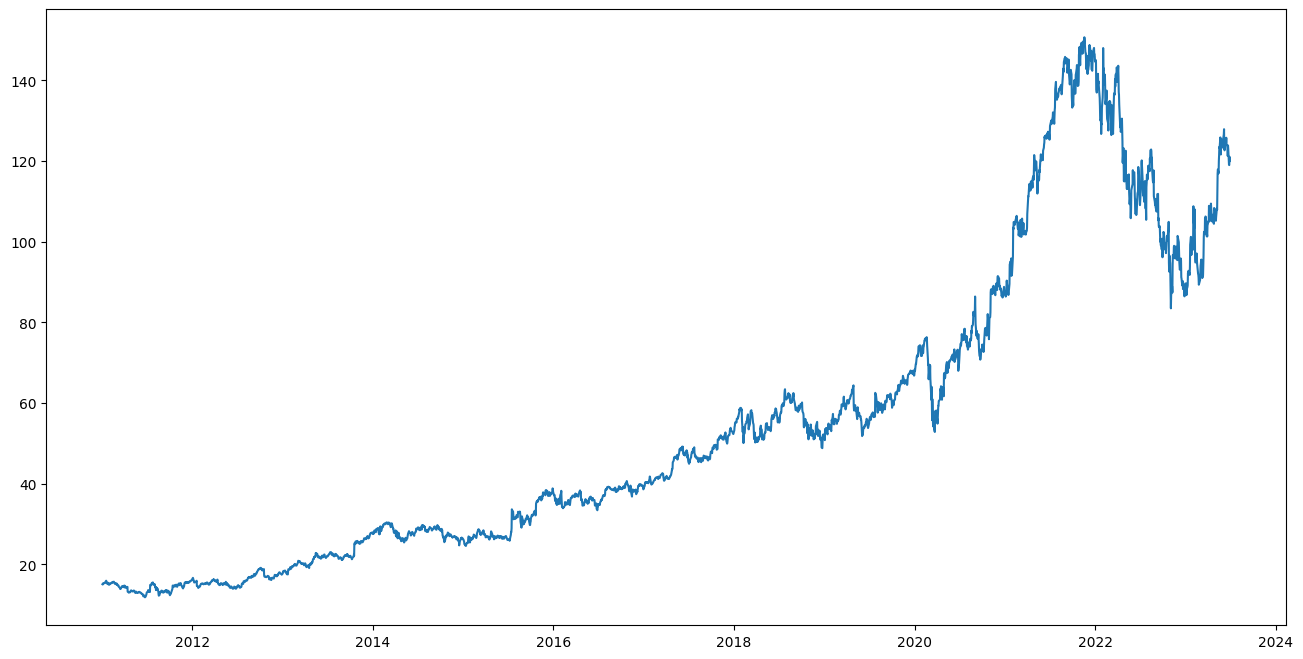

In [7]:
plt.figure(figsize=(16,8))
plt.plot(df.Close)

In [8]:
df.shape

(3143, 6)

In [9]:
close_df=df.filter(['Close'])

In [10]:
dataset=close_df.values
dataset

array([[ 15.05233 ],
       [ 14.996788],
       [ 15.16989 ],
       ...,
       [119.010002],
       [121.080002],
       [120.010002]])

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
standardized_data=scaler.fit_transform(dataset)
print(standardized_data)

[[-1.05561379]
 [-1.05711608]
 [-1.05243403]
 ...
 [ 1.75622617]
 [ 1.81221539]
 [ 1.7832741 ]]


In [12]:
train_data_len=math.ceil(len(standardized_data)*0.8)
train_data_len

2515

In [13]:
train_data=standardized_data[0:train_data_len, :]
train_data.shape

(2515, 1)

In [14]:
X_train=[]
Y_train=[]
for i in range(50,len(train_data)):
  X_train.append(train_data[i-50:i ,0])
  Y_train.append(train_data[i, 0])
  if i<=51:
    print(X_train)
    print(Y_train)
    print()



[array([-1.05561379, -1.05711608, -1.05243403, -1.04944967, -1.04746909,
       -1.04897136, -1.04775874, -1.0471794 , -1.04730066, -1.04225484,
       -1.03184658, -1.03715514, -1.04051003, -1.0505747 , -1.05107996,
       -1.04513142, -1.04742865, -1.04723328, -1.05787732, -1.05830173,
       -1.0511069 , -1.05046018, -1.05170647, -1.05114734, -1.04891748,
       -1.04616216, -1.04742865, -1.04746909, -1.04203927, -1.03958037,
       -1.04227505, -1.0422279 , -1.04152728, -1.03828018, -1.05166606,
       -1.05091829, -1.05260246, -1.05178058, -1.04951705, -1.05803228,
       -1.05801205, -1.05210394, -1.05812659, -1.06416269, -1.06372481,
       -1.06408858, -1.07181563, -1.0742341 , -1.07876119, -1.07905087])]
[-1.0874448480806782]

[array([-1.05561379, -1.05711608, -1.05243403, -1.04944967, -1.04746909,
       -1.04897136, -1.04775874, -1.0471794 , -1.04730066, -1.04225484,
       -1.03184658, -1.03715514, -1.04051003, -1.0505747 , -1.05107996,
       -1.04513142, -1.04742865, -1.0

In [15]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_train.shape

(2465, 50)

In [16]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(2465, 50, 1)

**MODEL**

In [17]:
from keras.layers.attention.multi_head_attention import activation
from keras.engine.base_layer import input_spec
model=Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))




In [18]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='adam',loss='mse',metrics=['mean_absolute_error'])


In [63]:
model.fit(X_train, Y_train,batch_size=1, epochs=1)

2465/2465 [==============================] - 67s 27ms/step - loss: 6.6280e-04 - mean_absolute_error: 0.0176


In [64]:
test_data=standardized_data[train_data_len-50:,:]
test_data

array([[0.61265308],
       [0.64148623],
       [0.69203871],
       [0.72181861],
       [0.75653466],
       [0.68817091],
       [0.70684745],
       [0.58832352],
       [0.65678181],
       [0.72950015],
       [0.73628915],
       [0.7689901 ],
       [0.90276914],
       [0.92202743],
       [0.91983652],
       [0.92152701],
       [0.8909493 ],
       [0.90761075],
       [0.90372934],
       [0.94048751],
       [0.94638401],
       [0.9311966 ],
       [0.89959101],
       [0.92277114],
       [0.89338351],
       [0.88347041],
       [0.92947905],
       [0.93292774],
       [0.96235581],
       [0.91847063],
       [0.96899605],
       [1.00936509],
       [1.00776932],
       [1.00941916],
       [0.99791029],
       [0.99665254],
       [0.95010302],
       [0.93820206],
       [0.94691147],
       [0.91755086],
       [0.92797778],
       [0.92152701],
       [0.90110569],
       [0.87826377],
       [0.88956978],
       [0.86810738],
       [0.88011666],
       [0.888

In [65]:
X_test=[]
Y_test=dataset[train_data_len:,:]
for i in range(50,len(test_data)):
  X_test.append(test_data[i-50:i,0])

In [66]:
X_test=np.array(X_test)
X_test.shape

(628, 50)

In [67]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(628, 50, 1)

In [68]:
predic=model.predict(X_test)
predic.shape

20/20 [==============================] - 0s 17ms/step


(628, 1)

In [69]:
predic


array([[0.94489217],
       [0.9208464 ],
       [0.9316046 ],
       [0.9075276 ],
       [0.916923  ],
       [0.91277605],
       [0.96938616],
       [1.0019766 ],
       [0.9612219 ],
       [0.93242484],
       [0.93756527],
       [0.92265236],
       [0.91463554],
       [0.9739377 ],
       [1.0896596 ],
       [1.1136483 ],
       [1.1270257 ],
       [1.1304051 ],
       [1.151374  ],
       [1.0633185 ],
       [1.0811068 ],
       [1.0574764 ],
       [1.1198164 ],
       [1.1604078 ],
       [1.3117954 ],
       [1.334572  ],
       [1.3721403 ],
       [1.3792233 ],
       [1.373052  ],
       [1.3853912 ],
       [1.3894731 ],
       [1.397901  ],
       [1.4170184 ],
       [1.4272404 ],
       [1.4184614 ],
       [1.4014039 ],
       [1.3631556 ],
       [1.3604157 ],
       [1.3835613 ],
       [1.3250682 ],
       [1.3160034 ],
       [1.3591816 ],
       [1.3625079 ],
       [1.3127604 ],
       [1.3246251 ],
       [1.3868146 ],
       [1.3163085 ],
       [1.327

In [70]:
predic=scaler.inverse_transform(predic)
predic

array([[ 89.01385 ],
       [ 88.12484 ],
       [ 88.52258 ],
       [ 87.63242 ],
       [ 87.97978 ],
       [ 87.82647 ],
       [ 89.919426],
       [ 91.12434 ],
       [ 89.61758 ],
       [ 88.55291 ],
       [ 88.74296 ],
       [ 88.19161 ],
       [ 87.89522 ],
       [ 90.0877  ],
       [ 94.3661  ],
       [ 95.253   ],
       [ 95.74758 ],
       [ 95.87252 ],
       [ 96.647766],
       [ 93.392235],
       [ 94.04989 ],
       [ 93.17624 ],
       [ 95.48104 ],
       [ 96.98176 ],
       [102.57877 ],
       [103.42085 ],
       [104.80981 ],
       [105.07168 ],
       [104.84351 ],
       [105.29971 ],
       [105.45062 ],
       [105.76222 ],
       [106.46902 ],
       [106.84694 ],
       [106.52237 ],
       [105.89172 ],
       [104.47763 ],
       [104.376335],
       [105.232056],
       [103.06949 ],
       [102.73435 ],
       [104.33071 ],
       [104.45369 ],
       [102.61445 ],
       [103.05311 ],
       [105.35234 ],
       [102.74563 ],
       [103.1

In [71]:
Y_test.shape

(628, 1)

In [72]:
rmse=np.sqrt(np.mean(predic-Y_test)**2)
rmse

1.2460710902970422

In [73]:
train=df[:train_data_len]
valid=df[train_data_len:]
valid['pred']=predic



<ipython-input-73-6141d5ba87c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred']=predic


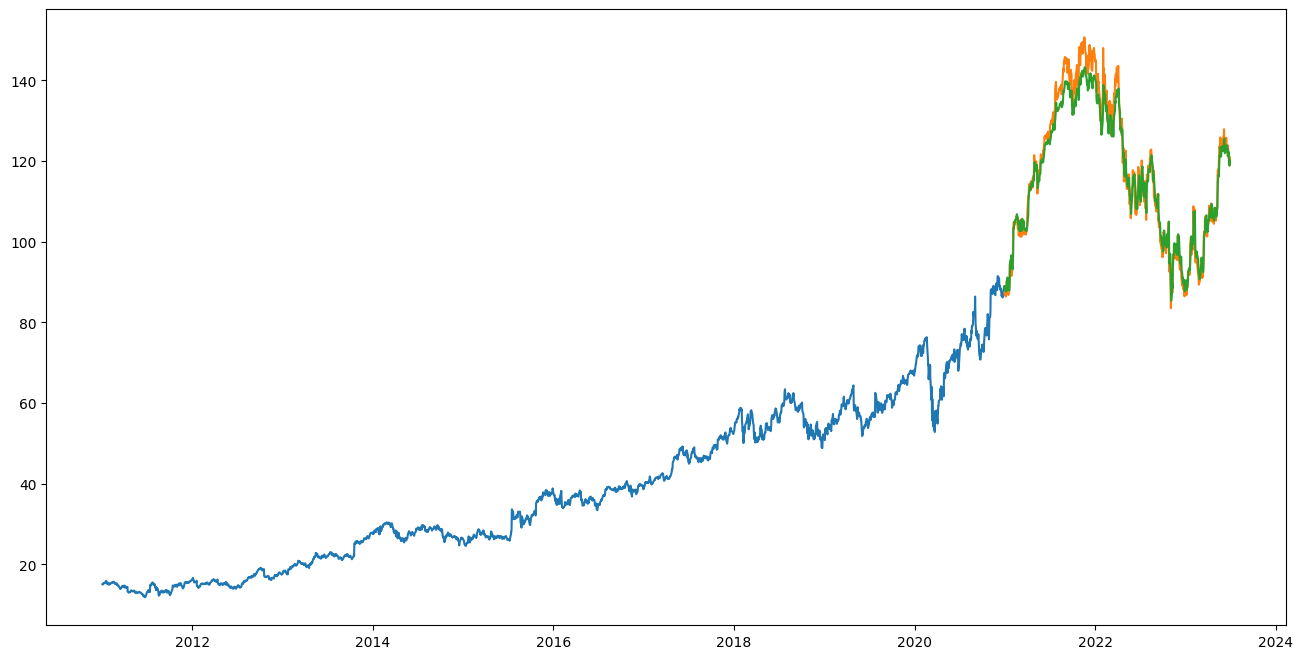

In [74]:
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(valid['pred'])